# Übungsblatt 6

Lernziele:
- Klassifikation mit Multi Layer Perzeptron



Eine Laderoutine für die MNIST Ziffern Stichprobe:

In [1]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

Lade Trainingsdaten (Daten sollten unter ./mnist gespeichert sein!)

In [2]:
X_train,y_train=load_mnist("mnist")

In [3]:
X_train = X_train / 255

Zeige das erste Exemplar jeder Klasse

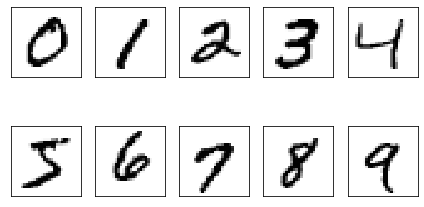

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

Schritt 1: Trainieren Sie ein MLP mit den Ziffern der MNIST Stichprobe

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
clf = MLPClassifier()

In [7]:
clf.fit(X_train, y_train)

MLPClassifier()

Schritt 2: Testen Sie das Neuronale Netz mit Hilfe der MNIST Teststichprobe und geben Sie die Verwechslungsmatrix an!

In [8]:
X_test, y_test = load_mnist("mnist", kind="t10k")

In [9]:
X_test = X_test / 255 # Normalization 

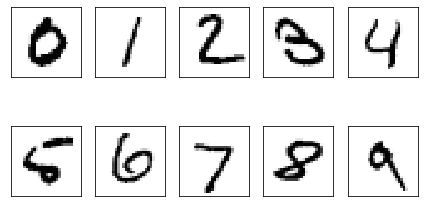

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_test[y_test == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [11]:
predictions = clf.predict(X_test)
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cf_matrix = confusion_matrix(y_test, predictions)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=clf.classes_)

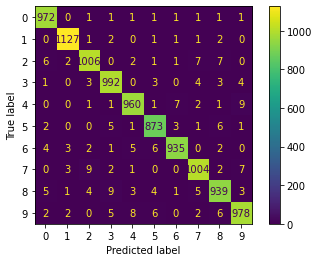

In [16]:
disp.plot()
plt.show()

In [17]:
import seaborn as sns

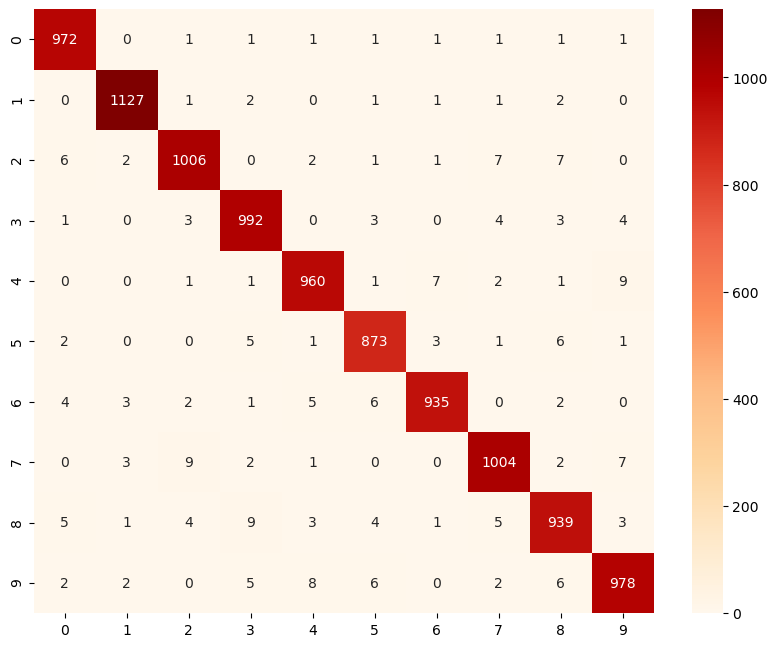

In [18]:
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(cf_matrix, cmap="OrRd", annot=True, fmt="d")
plt.show()

In [19]:
clf.score(X_test, y_test)

0.9786